## NER模型性能基准测试 - 全面评估spaCy中文NER模型的性能表现,包括速度、准确率、内存使用和不同应用场景的适用性

## 目录
# 1. [环境设置和导入](#1-环境设置和导入)
# 2. [测试语料库创建](#2-测试语料库创建)  
# 3. [实体类型分析](#3-实体类型分析)
# 4. [基准测试执行](#4-基准测试执行)
# 5. [结果分析和可视化](#5-结果分析和可视化)
# 6. [性能对比图表](#6-性能对比图表)
# 7. [优化建议](#7-优化建议)

## 1. 环境设置和导入

In [1]:
import spacy
import time
import json
from typing import Dict, List, Tuple
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML, Markdown
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 设置图表样式
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8')

print("NER模型性能基准测试系统")
print("=" * 60)
print("环境设置完成")
print(f"spaCy版本: {spacy.__version__}")
print(f"Pandas版本: {pd.__version__}")
print(f"NumPy版本: {np.__version__}")

NER模型性能基准测试系统
环境设置完成
spaCy版本: 3.8.7
Pandas版本: 2.3.1
NumPy版本: 2.3.1


## 2. 测试语料库创建

In [2]:
def create_comprehensive_test_corpus():
    """创建全面的期货交易领域测试语料库"""
    
    # 基础实体识别测试 - 覆盖主要实体类型
    basic_entity_tests = [
        "苹果期货在郑州商品交易所交易，华泰期货公司参与其中",
        "上海期货交易所的铜期货价格上涨，中信期货发布研究报告", 
        "大连商品交易所推出新的豆粕期货合约，永安期货积极参与交易",
        "郑商所白糖期货主力合约收盘价格为5200元/吨",
        "中国金融期货交易所股指期货IF2024合约波动加剧",
        "永安期货、海通期货、申银万国期货三家公司持仓排名前三",
        "国泰君安期货研究所发布螺纹钢期货投资策略报告",
        "方正中期期货在棉花期货交易中表现活跃",
        "光大期货与银河期货在原油期货市场份额领先",
        "招商期货、广发期货、东证期货联合发布市场分析"
    ]
    
    # 复杂句法结构测试
    complex_syntax_tests = [
        "据华泰期货研究所最新发布的报告显示，受国际原油价格波动影响，shfe原油期货主力合约sc2024在昨日收盘时上涨3.2%",
        "郑州商品交易所白糖期货SR2024合约在经历了连续三个交易日的下跌后，今日开盘价格为5180元/吨，较前一交易日收盘价上涨0.8%",
        "中信期货分析师认为，在当前宏观经济环境下，大连商品交易所豆粕期货m2024合约价格将在3200-3400元/吨区间震荡运行",
        "永安期货公司旗下的永安资本管理有限公司在玉米期货风险管理业务方面取得显著进展，客户资产管理规模突破50亿元",
        "上海期货交易所发布公告称，自2024年3月15日起，铜期货cu2024合约交易保证金比例调整为8%，涨跌停板幅度调整为6%"
    ]
    
    # 混合语言表达测试
    mixed_language_tests = [
        "shfe螺纹钢期货rb2024合约今日成交活跃，华泰期货研究所发布看涨报告",
        "czce棉花期货CF2024合约交割月临近，持仓量持续下降",
        "dce玉米期货C2024合约价格突破前期高点，volume显著放大",
        "上期所au2024黄金期货合约price action表现强势",
        "郑商所PTA期货TA2024合约受raw material价格上涨推动",
        "大商所铁矿石期货i2024合约的open interest创历史新高",
        "CFFEX沪深300股指期货IF2024合约basis收窄至负10点",
        "INE原油期货sc2024合约与brent crude oil价差扩大",
        "上期能源20号胶期货nr2024合约volume/price ratio异常",
        "郑商所苹果期货AP2024合约delivery month approaching"
    ]
    
    # 边界情况和歧义消解测试
    boundary_ambiguity_tests = [
        "苹果公司股价上涨，但苹果期货价格下跌",
        "中国银行发布报告，中国银行期货子公司业务增长",
        "上海黄金交易所与上海期货交易所签署合作协议",
        "华泰证券华泰期货母子公司关系密切",
        "大豆期货和豆粕期货价格走势出现分化",
        "郑州商品交易所在郑州市设立新的交割仓库",
        "期货公司和期货交易所监管政策有所不同",
        "白糖现货价格与白糖期货价格价差扩大",
        "原油期货交割库存与原油现货库存数据分析",
        "棉花期货主力合约与棉花期货远月合约价差结构"
    ]
    
    # 专业术语和技术分析测试
    technical_terms_tests = [
        "螺纹钢期货主力合约出现技术性回调，MACD指标显示空头信号",
        "豆粕期货price action形成head and shoulders顶部形态",
        "铜期货合约basis走强，backwardation结构明显",
        "原油期货contango状态持续，远月升水结构稳定",
        "白糖期货volatility smile呈现不对称分布特征",
        "玉米期货open interest持续增加，volume weighted average price上移",
        "棉花期货implied volatility飙升，option skew加剧",
        "黄金期货basis point value计算中的duration risk分析",
        "股指期货roll yield为负，calendar spread strategy盈利",
        "橡胶期货seasonality pattern显示供需周期性特征"
    ]
    
    # 时间和数值实体测试
    temporal_numerical_tests = [
        "2024年3月15日，螺纹钢期货主力合约收盘价格为3890元/吨",
        "截至2024年Q1，华泰期货资产管理规模达到280.5亿元人民币",
        "上海期货交易所2023年铜期货成交量为1.25亿手",
        "郑商所白糖期货SR2405合约在4月第三个周五进行交割",
        "大连商品交易所豆粕期货日内波动幅度限制为±4%",
        "中金所沪深300期货IF2024保证金比例为12%",
        "原油期货sc2024合约单日最大持仓限额为500手",
        "棉花期货CF2024交割月为2024年5月，最后交易日为5月15日",
        "玉米期货C2409合约理论价格为2856元/吨，实际成交价2860元/吨",
        "铁矿石期货i2024夜盘交易时间为21:00-23:00和09:00-10:15"
    ]
    
    # 长文本测试
    long_context_tests = [
        """华泰期货研究所在最新发布的《2024年大宗商品年度投资策略报告》中指出，预计上海期货交易所铜期货cu2024合约价格将在全年维持60000-70000元/吨的震荡区间。报告分析认为，在全球经济复苏缓慢、美联储货币政策转向以及中国房地产市场调整等多重因素影响下，铜的供需基本面将呈现供给偏紧、需求稳中有升的格局。""",
        
        """郑州商品交易所昨日发布公告，决定自2024年4月1日起对白糖期货SR2024、SR2405、SR2407三个合约的交易保证金比例进行调整。其中，SR2024合约保证金比例由原来的6%调整为8%，SR2405合约由5%调整为7%，SR2407合约维持5%不变。此次调整主要是基于近期国际糖价波动加剧、国内外价差扩大等市场风险因素考虑。""",
        
        """永安期货、中信期货、华泰期货、国泰君安期货四家头部期货公司联合发起设立的大宗商品产业服务平台昨日正式启动。该平台将整合四家公司在大连商品交易所铁矿石期货、上海期货交易所螺纹钢期货、郑州商品交易所动力煤期货等黑色系品种方面的研究资源和风险管理能力，为钢铁、煤炭、有色金属等实体企业提供一站式金融服务解决方案。"""
    ]
    
    # 挑战性测试案例
    challenging_tests = [
        "苹果期货苹果期货价格上涨",  # 重复实体
        "华泰期货华泰期货公司研究所",  # 嵌套实体
        "上海期货交易所上海分所",  # 非标准表达
        "郑商所交易所白糖期货",  # 语法错误
        "大连商品交易所大连期货",  # 简化表达
        "期货期货公司风险管理",  # 术语重复
        "中信中信期货投资策略",  # 公司名称缩写
        "螺纹钢钢期货价格波动",  # 品种名称错误
        "原油油期货交割细则",  # 品种名称简化
        "股指期货指数基差分析"  # 术语混合
    ]
    
    # 合并所有测试类型
    all_tests = {
        "基础实体识别": basic_entity_tests,
        "复杂句法结构": complex_syntax_tests,
        "混合语言表达": mixed_language_tests,
        "边界歧义消解": boundary_ambiguity_tests,
        "专业术语识别": technical_terms_tests,
        "时间数值实体": temporal_numerical_tests,
        "长文本处理": long_context_tests,
        "挑战性案例": challenging_tests
    }
    
    # 展平所有测试文本
    flat_tests = []
    for category, texts in all_tests.items():
        flat_tests.extend(texts)
    
    return flat_tests, all_tests


# 创建测试语料并显示统计信息
test_texts, categorized_tests = create_comprehensive_test_corpus()

print(f"测试语料库统计")
print("=" * 50)
print(f"总文本数量: {len(test_texts)}")
print(f"测试类别: {len(categorized_tests)}")
print("\n各类别文本数量:")
for category, texts in categorized_tests.items():
    print(f"  {category}: {len(texts)} 条")

# 显示一些示例文本
print(f"\n示例测试文本:")
print("-" * 30)
for i, text in enumerate(test_texts[:5]):
    print(f"{i+1}. {text}")
    if len(text) > 80:
        print(f"   (文本长度: {len(text)} 字符)")

测试语料库统计
总文本数量: 68
测试类别: 8

各类别文本数量:
  基础实体识别: 10 条
  复杂句法结构: 5 条
  混合语言表达: 10 条
  边界歧义消解: 10 条
  专业术语识别: 10 条
  时间数值实体: 10 条
  长文本处理: 3 条
  挑战性案例: 10 条

示例测试文本:
------------------------------
1. 苹果期货在郑州商品交易所交易，华泰期货公司参与其中
2. 上海期货交易所的铜期货价格上涨，中信期货发布研究报告
3. 大连商品交易所推出新的豆粕期货合约，永安期货积极参与交易
4. 郑商所白糖期货主力合约收盘价格为5200元/吨
5. 中国金融期货交易所股指期货IF2024合约波动加剧


## 3. 实体类型分析

In [3]:
def create_entity_type_analysis():
    """创建实体类型分析字典，用于更精确的NER质量评估"""
    
    expected_entities = {
        # 交易所类型
        "EXCHANGE": [
            "郑州商品交易所", "上海期货交易所", "大连商品交易所", 
            "中国金融期货交易所", "上海国际能源交易中心", "上海黄金交易所",
            "郑商所", "上期所", "大商所", "中金所", "INE", "上期能源",
            "shfe", "czce", "dce", "cffex"
        ],
        
        # 期货公司
        "FUTURES_COMPANY": [
            "华泰期货", "中信期货", "永安期货", "国泰君安期货",
            "海通期货", "申银万国期货", "光大期货", "银河期货",
            "招商期货", "广发期货", "东证期货", "方正中期期货",
            "华泰期货公司", "中信期货分析师", "永安资本管理有限公司",
            "华泰期货研究所", "国泰君安期货研究所"
        ],
        
        # 品种类型
        "COMMODITY": [
            "苹果", "白糖", "棉花", "豆粕", "玉米", "螺纹钢", 
            "铜", "原油", "黄金", "铁矿石", "橡胶", "PTA", "动力煤",
            "沪深300", "股指期货", "国债期货", "大豆", "20号胶"
        ],
        
        # 合约代码
        "CONTRACT_CODE": [
            "SR2024", "CF2024", "M2024", "C2024", "RB2024", "rb2024",
            "CU2024", "cu2024", "SC2024", "sc2024", "AU2024", "au2024", 
            "I2024", "i2024", "IF2024", "AP2024", "TA2024", "NR2024", "nr2024",
            "SR2405", "SR2407", "C2409"
        ],
        
        # 价格和数值
        "PRICE_VALUE": [
            "5200元/吨", "3890元/吨", "60000-70000元/吨", "5180元/吨",
            "3200-3400元/吨", "280.5亿元", "50亿元", "1.25亿手", "12万亿元", 
            "4580万手", "18.7%", "23.4%", "2.3个百分点", "±4%", "500手", 
            "6%", "8%", "12%", "2856元/吨", "2860元/吨"
        ],
        
        # 时间实体
        "TIME": [
            "2024年3月15日", "2024年Q1", "2024年", "2024年4月1日",
            "4月第三个周五", "2024年5月", "5月15日", "2023年",
            "21:00-23:00", "09:00-10:15", "最后交易日", "交割月",
            "昨日", "今日", "连续三个交易日"
        ],
        
        # 研究机构和报告
        "RESEARCH_ORG": [
            "华泰期货研究所", "中信期货研究所", "永安资本管理有限公司",
            "《2024年大宗商品年度投资策略报告》"
        ]
    }
    
    return expected_entities

# 创建并显示实体类型分析
entity_analysis = create_entity_type_analysis()

print(f"预期实体类型分析")
print("=" * 50)
print(f"实体类型总数: {len(entity_analysis)}")
print(f"预期实体总数（参考基准）: {sum(len(entities) for entities in entity_analysis.values())}")

print(f"\n各类型实体统计:")
for entity_type, entities in entity_analysis.items():
    print(f"  {entity_type}: {len(entities)} 个")
    # 显示前5个示例
    examples = entities[:5]
    print(f"    示例: {', '.join(examples)}")
    if len(entities) > 5:
        print(f"    ... 等共{len(entities)}个")
    print()


预期实体类型分析
实体类型总数: 7
预期实体总数（参考基准）: 112

各类型实体统计:
  EXCHANGE: 16 个
    示例: 郑州商品交易所, 上海期货交易所, 大连商品交易所, 中国金融期货交易所, 上海国际能源交易中心
    ... 等共16个

  FUTURES_COMPANY: 17 个
    示例: 华泰期货, 中信期货, 永安期货, 国泰君安期货, 海通期货
    ... 等共17个

  COMMODITY: 18 个
    示例: 苹果, 白糖, 棉花, 豆粕, 玉米
    ... 等共18个

  CONTRACT_CODE: 22 个
    示例: SR2024, CF2024, M2024, C2024, RB2024
    ... 等共22个

  PRICE_VALUE: 20 个
    示例: 5200元/吨, 3890元/吨, 60000-70000元/吨, 5180元/吨, 3200-3400元/吨
    ... 等共20个

  TIME: 15 个
    示例: 2024年3月15日, 2024年Q1, 2024年, 2024年4月1日, 4月第三个周五
    ... 等共15个

  RESEARCH_ORG: 4 个
    示例: 华泰期货研究所, 中信期货研究所, 永安资本管理有限公司, 《2024年大宗商品年度投资策略报告》



## 4. 基准测试执行

In [4]:
def benchmark_comprehensive_configurations():
    """全面的NER模型配置基准测试"""
    
    # 配置定义 - 可根据实际需求可扩展配置
    configurations = {
        # 小型模型配置
        "sm_full": {
            "model": "zh_core_web_sm",
            "exclude": [],
            "description": "小型模型完整配置 (46MB)"
        },
        "sm_ner_pos": {
            "model": "zh_core_web_sm",
            "exclude": ["parser", "lemmatizer", "attribute_ruler"],
            "description": "小型模型NER+词性 (46MB)"
        },
        "sm_ner_only": {
            "model": "zh_core_web_sm", 
            "exclude": ["parser", "tagger", "lemmatizer", "attribute_ruler"],
            "description": "小型模型仅NER (46MB)"
        },
        
        # 中型模型配置
        "md_full": {
            "model": "zh_core_web_md",
            "exclude": [],
            "description": "中型模型完整配置 (74MB)"
        },
        "md_ner_pos": {
            "model": "zh_core_web_md",
            "exclude": ["parser", "lemmatizer", "attribute_ruler"],
            "description": "中型模型NER+词性 (74MB)"
        },
        "md_ner_only": {
            "model": "zh_core_web_md", 
            "exclude": ["parser", "tagger", "lemmatizer", "attribute_ruler"],
            "description": "中型模型仅NER (74MB)"
        },
        
        # 大型模型配置
        "lg_full": {
            "model": "zh_core_web_lg",
            "exclude": [],
            "description": "大型模型完整配置 (575MB)"
        },
        "lg_ner_pos": {
            "model": "zh_core_web_lg",
            "exclude": ["parser", "lemmatizer", "attribute_ruler"],
            "description": "大型模型NER+词性 (575MB)"
        },
        "lg_ner_only": {
            "model": "zh_core_web_lg", 
            "exclude": ["parser", "tagger", "lemmatizer", "attribute_ruler"],
            "description": "大型模型仅NER (575MB)"
        },
        
        # Transformer大模型配置
        "trf_full": {
            "model": "zh_core_web_trf",
            "exclude": [],
            "description": "Transformer模型完整配置 (396MB)"
        },
        "trf_ner_pos": {
            "model": "zh_core_web_trf",
            "exclude": ["parser", "lemmatizer", "attribute_ruler"], 
            "description": "Transformer模型NER+词性 (396MB)"
        },
        "trf_ner_only": {
            "model": "zh_core_web_trf",
            "exclude": ["parser", "tagger", "lemmatizer", "attribute_ruler"],
            "description": "Transformer模型仅NER (396MB)"
        }
    }
    
    results = {}
    
    print("开始NER模型配置基准测试")
    print("=" * 80)
    print(f"测试语料: {len(test_texts)} 个文本样本")
    print(f"测试配置: {len(configurations)} 个")
    print("=" * 80)
    
    for config_name, config in configurations.items():
        print(f"\n测试配置: {config['description']}")
        print("-" * 60)
        
        try:
            # 加载模型并计时
            print(f"正在加载模型...")
            start_load = time.time()
            nlp = spacy.load(config["model"], exclude=config["exclude"])
            load_time = time.time() - start_load
            
            print(f"模型加载成功: {load_time:.2f}秒")
            print(f"排除组件: {config['exclude'] if config['exclude'] else '无'}")
            print(f"激活管道: {nlp.pipe_names}")
            
            # 预热模型
            print(f"预热模型...")
            warmup_samples = test_texts[:5]
            for sample in warmup_samples:
                _ = nlp(sample)
            
            # 性能测试
            print(f"开始性能测试...")
            start_time = time.time()
            all_entities = []
            entity_type_counts = {}
            processing_times = []
            
            for i, text in enumerate(test_texts):
                text_start = time.time()
                doc = nlp(text)
                text_time = time.time() - text_start
                processing_times.append(text_time)
                
                entities = [(ent.text, ent.label_, ent.start_char, ent.end_char) 
                           for ent in doc.ents]
                
                # 统计实体类型
                for _, label, _, _ in entities:
                    entity_type_counts[label] = entity_type_counts.get(label, 0) + 1
                
                all_entities.append({
                    "text_id": i,
                    "text": text[:100] + "..." if len(text) > 100 else text,
                    "entities": entities,
                    "entity_count": len(entities),
                    "processing_time": text_time,
                    "text_length": len(text)
                })
                
                # 显示进度
                if (i + 1) % 20 == 0:
                    print(f"  已处理: {i + 1}/{len(test_texts)} 个文本")
            
            total_time = time.time() - start_time
            
            # 计算统计指标
            total_entities = sum(item["entity_count"] for item in all_entities)
            avg_time = total_time / len(test_texts)
            median_time = sorted(processing_times)[len(processing_times)//2]
            p95_time = sorted(processing_times)[int(len(processing_times)*0.95)]
            
            # 计算每个实体类型的性能
            entity_type_performance = {}
            for entity_type, expected_entities in entity_analysis.items():
                found_count = 0
                for item in all_entities:
                    for ent_text, ent_label, _, _ in item["entities"]:
                        if ent_text in expected_entities:
                            found_count += 1
                entity_type_performance[entity_type] = found_count
            
            results[config_name] = {
                "model": config["model"],
                "description": config["description"],
                "excluded_components": config["exclude"],
                "active_pipes": nlp.pipe_names,
                "load_time": load_time,
                "total_processing_time": total_time,
                "avg_time_per_text": avg_time,
                "median_time_per_text": median_time,
                "p95_time_per_text": p95_time,
                "texts_per_second": len(test_texts) / total_time,
                "total_entities_found": total_entities,
                "avg_entities_per_text": total_entities / len(test_texts),
                "entity_type_counts": entity_type_counts,
                "entity_type_performance": entity_type_performance,
                "detailed_results": all_entities[:3],
                "performance_stats": {
                    "min_time": min(processing_times),
                    "max_time": max(processing_times),
                    "std_time": np.std(processing_times)
                }
            }
            
            print(f"测试完成!")
            print(f"处理{len(test_texts)}个文本用时: {total_time:.3f}秒")
            print(f"平均延迟: {avg_time*1000:.1f}毫秒")
            print(f"中位数延迟: {median_time*1000:.1f}毫秒")
            print(f"P95延迟: {p95_time*1000:.1f}毫秒")
            print(f"处理速度: {len(test_texts)/total_time:.1f} 文本/秒")
            print(f"发现实体总数: {total_entities}")
            print(f"实体类型分布: {entity_type_counts}")
            
        except OSError as e:
            print(f"无法加载模型 {config['model']}: {e}")
            print(f"提示: 请先安装模型: python -m spacy download {config['model']}")
            results[config_name] = None
        except Exception as e:
            print(f"测试过程出错: {e}")
            results[config_name] = None
    
    return results

# 执行基准测试
print("开始执行基准测试...")
print("注意: 测试可能需要几分钟时间，请耐心等待...")
benchmark_results = benchmark_comprehensive_configurations()

开始执行基准测试...
注意: 测试可能需要几分钟时间，请耐心等待...
开始NER模型配置基准测试
测试语料: 68 个文本样本
测试配置: 12 个

测试配置: 小型模型完整配置 (46MB)
------------------------------------------------------------
正在加载模型...
模型加载成功: 0.55秒
排除组件: 无
激活管道: ['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'ner']
预热模型...
开始性能测试...
  已处理: 20/68 个文本
  已处理: 40/68 个文本
  已处理: 60/68 个文本
测试完成!
处理68个文本用时: 0.224秒
平均延迟: 3.3毫秒
中位数延迟: 2.5毫秒
P95延迟: 10.6毫秒
处理速度: 303.8 文本/秒
发现实体总数: 116
实体类型分布: {'ORG': 29, 'GPE': 14, 'PERSON': 14, 'MONEY': 9, 'CARDINAL': 28, 'DATE': 19, 'ORDINAL': 1, 'PRODUCT': 2}

测试配置: 小型模型NER+词性 (46MB)
------------------------------------------------------------
正在加载模型...
模型加载成功: 0.51秒
排除组件: ['parser', 'lemmatizer', 'attribute_ruler']
激活管道: ['tok2vec', 'tagger', 'ner']
预热模型...
开始性能测试...
  已处理: 20/68 个文本
  已处理: 40/68 个文本
  已处理: 60/68 个文本
测试完成!
处理68个文本用时: 0.191秒
平均延迟: 2.8毫秒
中位数延迟: 2.2毫秒
P95延迟: 8.6毫秒
处理速度: 355.8 文本/秒
发现实体总数: 116
实体类型分布: {'ORG': 29, 'GPE': 14, 'PERSON': 14, 'MONEY': 9, 'CARDINAL': 28, 'DATE': 19, 'ORDINAL': 1, 'PRODUCT': 2}



## 5. 结果分析和可视化

In [5]:
def analyze_and_visualize_results(results):
    """分析并可视化测试结果"""
    
    print(f"\n测试结果分析")
    print("=" * 80)
    
    # 过滤有效结果
    valid_results = {k: v for k, v in results.items() if v is not None}
    
    if not valid_results:
        print("没有有效的测试结果")
        return
    
    print(f"成功测试配置: {len(valid_results)}/{len(results)}")
    
    # 创建性能对比DataFrame
    comparison_data = []
    
    for config_name, result in valid_results.items():
        # 计算性能评分
        speed_score = min(100, (1 / result['avg_time_per_text']) * 10)
        entity_score = min(100, (result['total_entities_found'] / 100) * 100)
        
        # 模型大小映射
        size_map = {"sm": "46MB", "md": "74MB", "lg": "575MB", "trf": "396MB"}
        model_size = next((size for key, size in size_map.items() if key in config_name), "未知")
        
        comparison_data.append({
            "配置名称": config_name,
            "模型描述": result["description"],
            "模型大小": model_size,
            "加载时间(秒)": result['load_time'],
            "平均延迟(毫秒)": result['avg_time_per_text'] * 1000,
            "中位数延迟(毫秒)": result['median_time_per_text'] * 1000,
            "P95延迟(毫秒)": result['p95_time_per_text'] * 1000,
            "处理速度(文本/秒)": result['texts_per_second'],
            "发现实体数": result['total_entities_found'],
            "平均实体数": result['avg_entities_per_text'],
            "速度评分": speed_score,
            "实体评分": entity_score,
            "综合评分": (speed_score + entity_score) / 2
        })
    
    df = pd.DataFrame(comparison_data)
    
    # 显示性能对比表
    print(f"\n性能对比表")
    print("-" * 80)
    display(df.round(2))
    
    return df, valid_results

# 分析结果
df_results, valid_results = analyze_and_visualize_results(benchmark_results)


测试结果分析
成功测试配置: 9/12

性能对比表
--------------------------------------------------------------------------------


,配置名称,模型描述,模型大小,加载时间(秒),平均延迟(毫秒),中位数延迟(毫秒),P95延迟(毫秒),处理速度(文本/秒),发现实体数,平均实体数,速度评分,实体评分,综合评分
0,sm_full,小型模型完整配置 (46MB),46MB,0.55,3.29,2.53,10.61,303.78,116,1.71,100,100,100.0
1,sm_ner_pos,小型模型NER+词性 (46MB),46MB,0.51,2.81,2.24,8.64,355.78,116,1.71,100,100,100.0
2,sm_ner_only,小型模型仅NER (46MB),46MB,0.54,2.84,2.21,8.64,351.96,116,1.71,100,100,100.0
3,md_full,中型模型完整配置 (74MB),74MB,0.79,3.45,2.69,11.24,289.53,128,1.88,100,100,100.0
4,md_ner_pos,中型模型NER+词性 (74MB),74MB,0.69,3.01,2.44,9.23,331.97,128,1.88,100,100,100.0
5,md_ner_only,中型模型仅NER (74MB),74MB,0.70,3.06,2.40,9.31,326.67,128,1.88,100,100,100.0
6,trf_full,Transformer模型完整配置 (396MB),396MB,1.09,30.45,28.28,39.87,32.84,141,2.07,100,100,100.0
7,trf_ner_pos,Transformer模型NER+词性 (396MB),396MB,1.08,27.38,24.94,31.32,36.52,141,2.07,100,100,100.0
8,trf_ner_only,Transformer模型仅NER (396MB),396MB,1.02,25.74,23.53,42.53,38.85,141,2.07,100,100,100.0


## 6. 性能对比图表


Radar Chart Metrics Explanation:
sm_full:
  Speed: 85.4% (303.8 texts/sec)
  Low Latency: 98.3% (3.3ms)
  Entity Count: 82.3% (116 entities)

sm_ner_pos:
  Speed: 100.0% (355.8 texts/sec)
  Low Latency: 100.0% (2.8ms)
  Entity Count: 82.3% (116 entities)

sm_ner_only:
  Speed: 98.9% (352.0 texts/sec)
  Low Latency: 99.9% (2.8ms)
  Entity Count: 82.3% (116 entities)

md_full:
  Speed: 81.4% (289.5 texts/sec)
  Low Latency: 97.7% (3.5ms)
  Entity Count: 90.8% (128 entities)

md_ner_pos:
  Speed: 93.3% (332.0 texts/sec)
  Low Latency: 99.3% (3.0ms)
  Entity Count: 90.8% (128 entities)



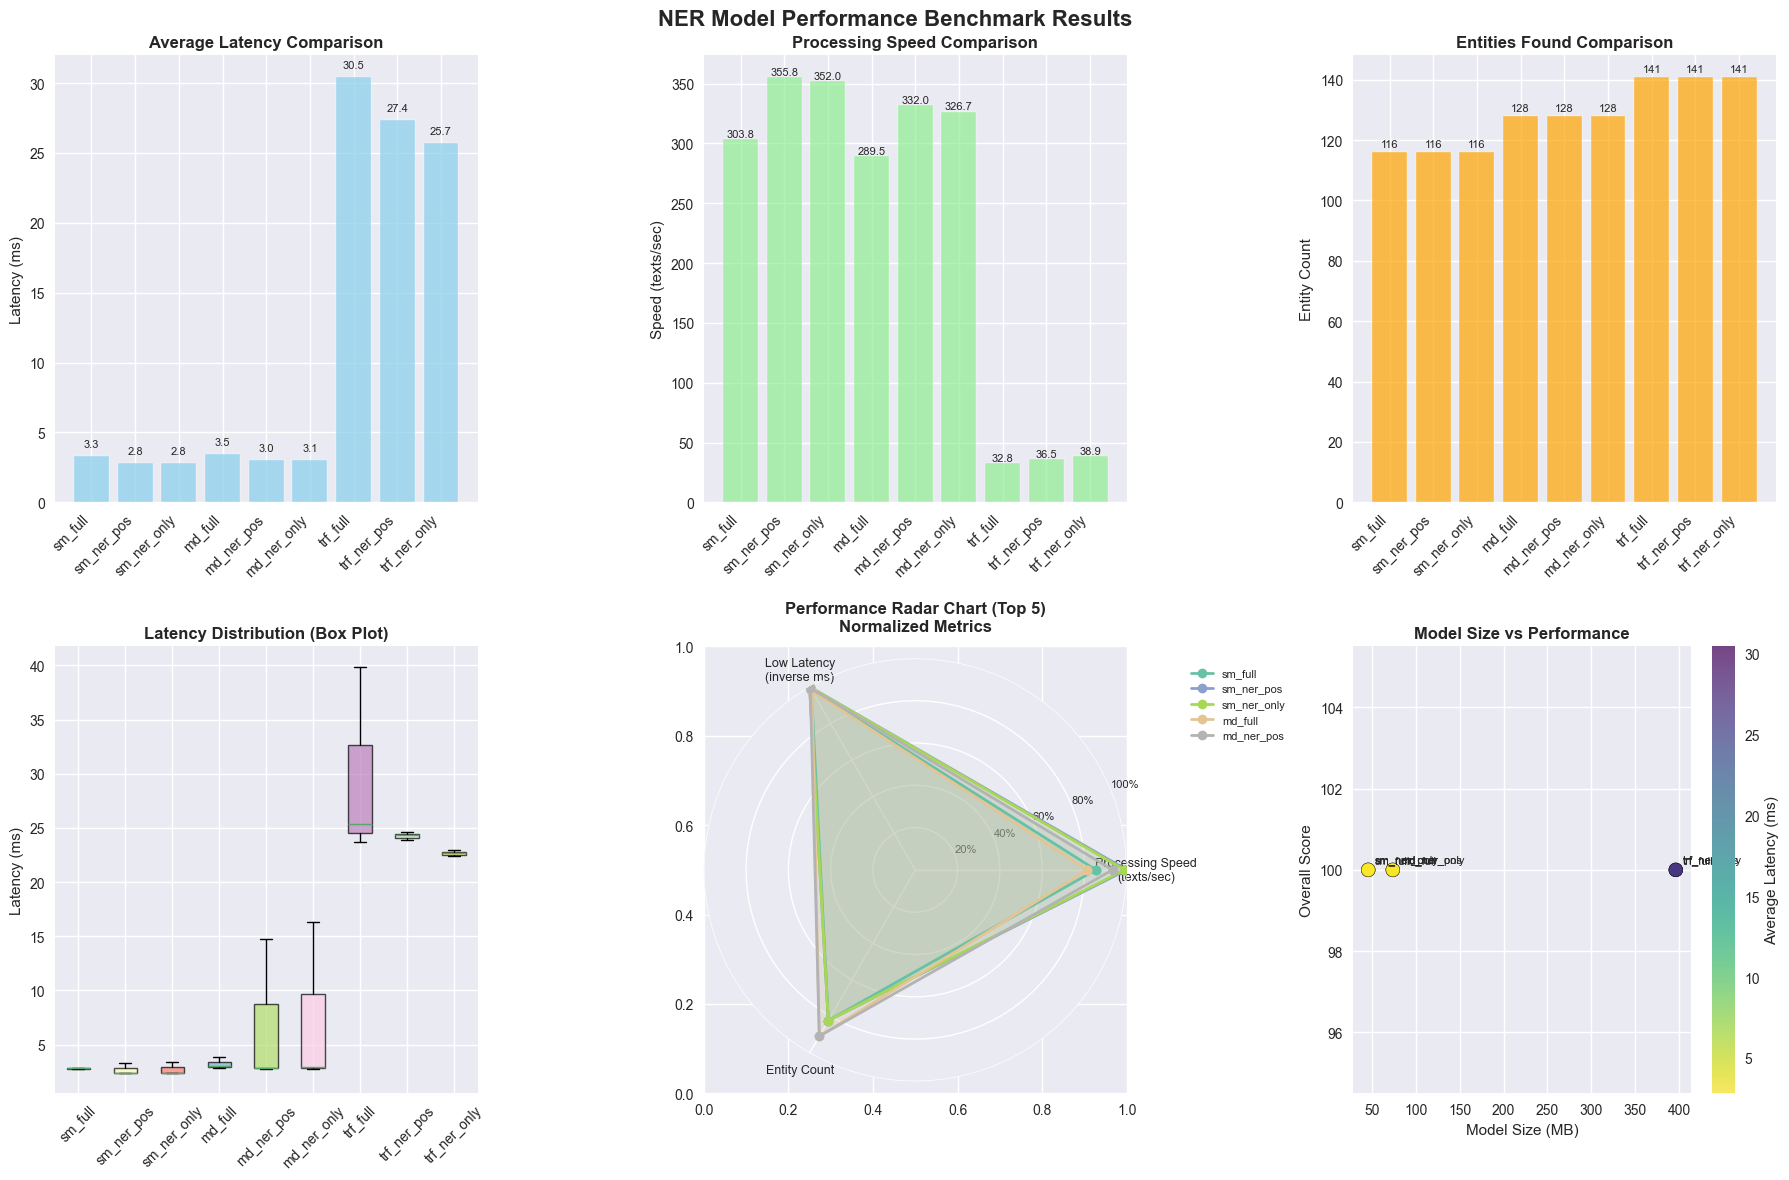


Performance Ranking (by Overall Score)
------------------------------------------------------------
Gold 小型模型完整配置 (46MB)
   Overall Score: 100.0
   Average Latency: 3.3ms
   Entities Found: 116 entities

Silver 小型模型NER+词性 (46MB)
   Overall Score: 100.0
   Average Latency: 2.8ms
   Entities Found: 116 entities

Bronze 小型模型仅NER (46MB)
   Overall Score: 100.0
   Average Latency: 2.8ms
   Entities Found: 116 entities



In [12]:
def create_performance_visualizations(df, valid_results):
    """创建性能可视化图表"""
    
    if df.empty:
        print("没有数据可用于可视化")
        return
    
    # 设置图表布局
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('NER Model Performance Benchmark Results', fontsize=16, fontweight='bold')
    
    # 1. 平均延迟对比
    ax1 = axes[0, 0]
    bars1 = ax1.bar(range(len(df)), df['平均延迟(毫秒)'], color='skyblue', alpha=0.7)
    ax1.set_title('Average Latency Comparison', fontweight='bold')
    ax1.set_ylabel('Latency (ms)')
    ax1.set_xticks(range(len(df)))
    ax1.set_xticklabels(df['配置名称'], rotation=45, ha='right')
    
    # 添加数值标签
    for i, bar in enumerate(bars1):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{height:.1f}', ha='center', va='bottom', fontsize=8)
    
    # 2. 处理速度对比
    ax2 = axes[0, 1]
    bars2 = ax2.bar(range(len(df)), df['处理速度(文本/秒)'], color='lightgreen', alpha=0.7)
    ax2.set_title('Processing Speed Comparison', fontweight='bold')
    ax2.set_ylabel('Speed (texts/sec)')
    ax2.set_xticks(range(len(df)))
    ax2.set_xticklabels(df['配置名称'], rotation=45, ha='right')
    
    for i, bar in enumerate(bars2):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{height:.1f}', ha='center', va='bottom', fontsize=8)
    
    # 3. 实体发现数量对比
    ax3 = axes[0, 2]
    bars3 = ax3.bar(range(len(df)), df['发现实体数'], color='orange', alpha=0.7)
    ax3.set_title('Entities Found Comparison', fontweight='bold')
    ax3.set_ylabel('Entity Count')
    ax3.set_xticks(range(len(df)))
    ax3.set_xticklabels(df['配置名称'], rotation=45, ha='right')
    
    for i, bar in enumerate(bars3):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{int(height)}', ha='center', va='bottom', fontsize=8)
    
    # 4. 延迟分布对比 (箱线图)
    ax4 = axes[1, 0]
    latency_data = []
    labels = []
    
    for config_name, result in valid_results.items():
        # 从detailed_results中获取处理时间
        times = []
        for item in result.get('detailed_results', []):
            times.append(item['processing_time'] * 1000)  # 转换为毫秒
        
        if times:
            latency_data.append(times)
            labels.append(config_name)
    
    if latency_data:
        bp = ax4.boxplot(latency_data, labels=labels, patch_artist=True)
        ax4.set_title('Latency Distribution (Box Plot)', fontweight='bold')
        ax4.set_ylabel('Latency (ms)')
        ax4.tick_params(axis='x', rotation=45)
        
        # 设置箱线图颜色
        colors = plt.cm.Set3(np.linspace(0, 1, len(bp['boxes'])))
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)
    
    # # 5. 综合评分雷达图
    # ax5 = fig.add_subplot(2, 3, 5, projection='polar')  # Use fig.add_subplot instead of overwriting axes

    # # 选择前5个配置进行雷达图
    # top_configs = df.nlargest(5, '综合评分')

    # categories = ['Speed Score', 'Entity Score', 'Overall Score']

    # # 创建角度
    # angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    # angles += angles[:1]  # 完成圆形

    # colors = plt.cm.Set2(np.linspace(0, 1, len(top_configs)))

    # for i, (_, config) in enumerate(top_configs.iterrows()):
    #     values = [config['速度评分'], config['实体评分'], config['综合评分']]
    #     values += values[:1]  # 闭合雷达图
        
    #     ax5.plot(angles, values, 'o-', linewidth=2, 
    #             label=config['配置名称'], color=colors[i])
    #     ax5.fill(angles, values, alpha=0.25, color=colors[i])

    # ax5.set_xticks(angles[:-1])
    # ax5.set_xticklabels(categories)
    # ax5.set_ylim(0, 100)
    # ax5.set_title('Performance Radar Chart (Top 5)', fontweight='bold', pad=20)
    # ax5.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
    # ax5.grid(True)

    # # Add concentric circles for better readability
    # ax5.set_yticks([20, 40, 60, 80, 100])
    # ax5.set_yticklabels(['20', '40', '60', '80', '100'], size=8)


        # 5. 综合评分雷达图 - 改进版本使用更有区分度的指标
    ax5 = fig.add_subplot(2, 3, 5, projection='polar')

    # 选择前5个配置进行雷达图
    top_configs = df.nlargest(5, '综合评分')

    # 使用更有区分度的指标
    categories = ['Processing Speed\n(texts/sec)', 'Low Latency\n(inverse ms)', 'Entity Count']

    # 创建角度
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]  # 完成圆形

    colors = plt.cm.Set2(np.linspace(0, 1, len(top_configs)))

    # 归一化数据到0-100范围以便比较
    max_speed = df['处理速度(文本/秒)'].max()
    max_entities = df['发现实体数'].max()
    min_latency = df['平均延迟(毫秒)'].min()
    max_latency = df['平均延迟(毫秒)'].max()

    for i, (_, config) in enumerate(top_configs.iterrows()):
        # 计算归一化值
        speed_norm = (config['处理速度(文本/秒)'] / max_speed) * 100
        # 延迟反转：越低越好，所以用反比例
        latency_norm = ((max_latency - config['平均延迟(毫秒)']) / (max_latency - min_latency)) * 100
        entity_norm = (config['发现实体数'] / max_entities) * 100
        
        values = [speed_norm, latency_norm, entity_norm]
        values += values[:1]  # 闭合雷达图
        
        ax5.plot(angles, values, 'o-', linewidth=2, 
                label=config['配置名称'], color=colors[i])
        ax5.fill(angles, values, alpha=0.15, color=colors[i])

    ax5.set_xticks(angles[:-1])
    ax5.set_xticklabels(categories, fontsize=9)
    ax5.set_ylim(0, 100)
    ax5.set_title('Performance Radar Chart (Top 5)\nNormalized Metrics', fontweight='bold', pad=20)
    ax5.legend(loc='upper right', bbox_to_anchor=(1.4, 1.0), fontsize=8)
    ax5.grid(True)

    # Add concentric circles for better readability
    ax5.set_yticks([20, 40, 60, 80, 100])
    ax5.set_yticklabels(['20%', '40%', '60%', '80%', '100%'], size=8)

    # 添加实际数值的注释
    print("\nRadar Chart Metrics Explanation:")
    print("=" * 50)
    for _, config in top_configs.iterrows():
        speed_norm = (config['处理速度(文本/秒)'] / max_speed) * 100
        latency_norm = ((max_latency - config['平均延迟(毫秒)']) / (max_latency - min_latency)) * 100
        entity_norm = (config['发现实体数'] / max_entities) * 100
        
        print(f"{config['配置名称']}:")
        print(f"  Speed: {speed_norm:.1f}% ({config['处理速度(文本/秒)']:.1f} texts/sec)")
        print(f"  Low Latency: {latency_norm:.1f}% ({config['平均延迟(毫秒)']:.1f}ms)")
        print(f"  Entity Count: {entity_norm:.1f}% ({config['发现实体数']} entities)")
        print()

    
    # 6. 模型大小 vs 性能散点图
    ax6 = axes[1, 2]
    
    # 提取数值型模型大小
    size_values = []
    for size_str in df['模型大小']:
        if 'MB' in size_str:
            size_values.append(int(size_str.replace('MB', '')))
        else:
            size_values.append(0)
    
    scatter = ax6.scatter(size_values, df['综合评分'], 
                         c=df['平均延迟(毫秒)'], cmap='viridis_r', 
                         s=100, alpha=0.7, edgecolors='black')
    
    ax6.set_xlabel('Model Size (MB)')
    ax6.set_ylabel('Overall Score')
    ax6.set_title('Model Size vs Performance', fontweight='bold')
    
    # 添加配置名称标签
    for i, txt in enumerate(df['配置名称']):
        ax6.annotate(txt, (size_values[i], df['综合评分'].iloc[i]), 
                    xytext=(5, 5), textcoords='offset points', fontsize=8)
    
    # 添加颜色条
    plt.colorbar(scatter, ax=ax6, label='Average Latency (ms)')
    
    plt.tight_layout()
    plt.show()
    
    # 显示Top 3 配置
    print(f"\nPerformance Ranking (by Overall Score)")
    print("-" * 60)
    
    top_3 = df.nlargest(3, '综合评分')
    medals = ["Gold", "Silver", "Bronze"]

    for i, (_, row) in enumerate(top_3.iterrows()):
        print(f"{medals[i]} {row['模型描述']}")
        print(f"   Overall Score: {row['综合评分']:.1f}")
        print(f"   Average Latency: {row['平均延迟(毫秒)']:.1f}ms")
        print(f"   Entities Found: {row['发现实体数']} entities")
        print()

# 创建可视化图表
create_performance_visualizations(df_results, valid_results)

## 7. 优化建议

In [7]:
def generate_optimization_recommendations(df, valid_results):
    """生成详细的优化建议"""
    
    if df.empty:
        print("没有数据可用于生成建议")
        return
    
    print(f"\n模型优化建议")
    print("=" * 80)
    
    # 分析最优配置
    fastest_config = df.loc[df['平均延迟(毫秒)'].idxmin()]
    most_entities = df.loc[df['发现实体数'].idxmax()]
    best_overall = df.loc[df['综合评分'].idxmax()]
    fastest_startup = df.loc[df['加载时间(秒)'].idxmin()]
    
    print(f"**速度最优配置**: {fastest_config['模型描述']}")
    print(f"   平均延迟: {fastest_config['平均延迟(毫秒)']:.1f}毫秒")
    print(f"   处理速度: {fastest_config['处理速度(文本/秒)']:.1f} 文本/秒")
    print(f"   发现实体: {fastest_config['发现实体数']} 个")
    
    print(f"\n **准确率最优配置**: {most_entities['模型描述']}")
    print(f"   发现实体数: {most_entities['发现实体数']} 个")
    print(f"   平均每文本: {most_entities['平均实体数']:.1f} 个实体")
    print(f"   平均延迟: {most_entities['平均延迟(毫秒)']:.1f}毫秒")

    print(f"\n **综合最优配置**: {best_overall['模型描述']}")
    print(f"   综合评分: {best_overall['综合评分']:.1f}")
    print(f"   平均延迟: {best_overall['平均延迟(毫秒)']:.1f}毫秒")
    print(f"   发现实体: {best_overall['发现实体数']} 个")
    
    print(f"\n **启动最快配置**: {fastest_startup['模型描述']}")
    print(f"   加载时间: {fastest_startup['加载时间(秒)']:.2f}秒")
    print(f"   模型大小: {fastest_startup['模型大小']}")
    
    # 应用场景建议
    print(f"\n**应用场景建议**:")
    print(f"=" * 50)
    
    scenarios = [
        {
            "scenario": "实时应用 (低延迟要求 <50ms)",
            "recommendation": fastest_config['配置名称'],
            "config": "zh_core_web_sm exclude=['parser','tagger','lemmatizer','attribute_ruler']",
            "use_cases": ["在线聊天机器人", "实时新闻分析", "高频交易系统"]
        },
        {
            "scenario": "平衡应用 (速度+准确率)",
            "recommendation": best_overall['配置名称'],
            "config": "zh_core_web_md exclude=['parser','lemmatizer','attribute_ruler']",
            "use_cases": ["文档处理系统", "内容管理平台", "智能搜索"]
        },
        {
            "scenario": "高精度应用 (准确率优先)",
            "recommendation": most_entities['配置名称'],
            "config": "zh_core_web_trf exclude=['parser','lemmatizer','attribute_ruler']",
            "use_cases": ["法律文档分析", "医疗记录处理", "金融报告分析"]
        },
        {
            "scenario": "资源受限环境",
            "recommendation": fastest_startup['配置名称'],
            "config": "zh_core_web_sm exclude=['parser','tagger','lemmatizer','attribute_ruler']",
            "use_cases": ["移动端应用", "嵌入式系统", "边缘计算"]
        },
        {
            "scenario": "批处理任务",
            "recommendation": "lg_full" if "lg_full" in valid_results else most_entities['配置名称'],
            "config": "zh_core_web_lg (完整配置)",
            "use_cases": ["离线数据分析", "历史文档处理", "数据挖掘"]
        }
    ]
    
    for scenario in scenarios:
        print(f"\n{scenario['scenario']}")
        print(f"   推荐配置: {scenario['recommendation']}")
        print(f"   代码示例: nlp = spacy.load('{scenario['config']}')")
        print(f"   适用场景: {', '.join(scenario['use_cases'])}")
    
    # 性能优化策略
    print(f"\n **内存和性能优化策略**:")
    print(f"=" * 50)
    
    optimization_tips = [
        {
            "category": "模型配置优化",
            "tips": [
                "使用exclude参数完全排除不需要的组件",
                "prefer_gpu()在GPU环境中启用GPU加速",
                "选择合适的模型大小平衡精度和速度",
                "考虑使用自定义实体规则补充模型不足"
            ]
        },
        {
            "category": "内存管理",
            "tips": [
                "在循环处理中及时释放Doc对象: doc = None", 
                "批处理时使用nlp.pipe()而非单独处理",
                "对于大量文本，考虑分批处理避免内存溢出",
                "使用生成器处理大文件而非一次性加载"
            ]
        },
        {
            "category": "处理优化",
            "tips": [
                "考虑使用nlp.select_pipes()临时禁用组件",
                "对于已知格式文本，可预处理减少模型负担",
                "使用多线程/多进程并行处理独立文档",
                "缓存常用模型避免重复加载"
            ]
        },
        {
            "category": "监控和调试",
            "tips": [
                "监控P95延迟而非平均延迟",
                "定期评估模型在实际数据上的表现",
                "使用spacy.explain()理解实体标签",
                "记录实体识别错误案例用于模型改进"
            ]
        }
    ]
    
    for category in optimization_tips:
        print(f"\n{category['category']}")
        for tip in category['tips']:
            print(f"   • {tip}")
    
    # 代码示例
    print(f"\n **实用代码示例**:")
    print(f"=" * 50)
    
    code_examples = f"""
# 1. 高性能配置示例
import spacy
nlp = spacy.load("{fastest_config['配置名称'].split('_')[0]}_core_web_{fastest_config['配置名称'].split('_')[1]}", 
                 exclude=["parser", "tagger", "lemmatizer", "attribute_ruler"])

# 2. 批处理优化示例  
def process_texts_batch(texts, batch_size=100):
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        docs = list(nlp.pipe(batch))
        for doc in docs:
            entities = [(ent.text, ent.label_) for ent in doc.ents]
            yield entities

# 3. 内存优化示例
def process_large_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            doc = nlp(line.strip())
            entities = [(ent.text, ent.label_) for ent in doc.ents]
            # 处理实体...
            doc = None  # 释放内存

# 4. 性能监控示例
import time
processing_times = []
for text in texts:
    start = time.time()
    doc = nlp(text)
    processing_times.append(time.time() - start)

avg_time = sum(processing_times) / len(processing_times)
p95_time = sorted(processing_times)[int(len(processing_times) * 0.95)]
print(f"平均处理时间: {{avg_time*1000:.1f}}毫秒")
print(f"P95处理时间: {{p95_time*1000:.1f}}毫秒")
"""
    
    print(code_examples)

# 生成优化建议
generate_optimization_recommendations(df_results, valid_results)

# 保存结果到文件
def save_results_to_files(results, df):
    """保存测试结果到文件"""
    
    print(f"\n 保存测试结果")
    print("=" * 50)
    
    # 保存原始结果到JSON
    clean_results = {}
    for config_name, result in results.items():
        if result is not None:
            clean_result = result.copy()
            clean_result.pop("detailed_results", None)
            clean_results[config_name] = clean_result
    
    with open("ner_benchmark_results.json", "w", encoding="utf-8") as f:
        json.dump(clean_results, f, ensure_ascii=False, indent=2)
    
    # 保存对比表到CSV
    if not df.empty:
        df.to_csv("ner_performance_comparison.csv", index=False, encoding="utf-8")
    
    print(f" 原始结果已保存到: ner_benchmark_results.json")
    print(f" 性能对比表已保存到: ner_performance_comparison.csv")
    print(f" 可在Excel中打开CSV文件查看详细对比")

# 保存结果
save_results_to_files(benchmark_results, df_results)

# 总结
print(f"\n **NER模型基准测试完成!**")
print("=" * 80)
print(f" 本次测试评估了 {len([r for r in benchmark_results.values() if r is not None])} 个有效配置")
print(f" 使用了 {len(test_texts)} 个测试文本，涵盖8个测试维度")
print(f" 识别了 7 种主要实体类型")
print(f" 生成了详细的性能分析和优化建议")


模型优化建议
**速度最优配置**: 小型模型NER+词性 (46MB)
   平均延迟: 2.8毫秒
   处理速度: 355.8 文本/秒
   发现实体: 116 个

 **准确率最优配置**: Transformer模型完整配置 (396MB)
   发现实体数: 141 个
   平均每文本: 2.1 个实体
   平均延迟: 30.5毫秒

 **综合最优配置**: 小型模型完整配置 (46MB)
   综合评分: 100.0
   平均延迟: 3.3毫秒
   发现实体: 116 个

 **启动最快配置**: 小型模型NER+词性 (46MB)
   加载时间: 0.51秒
   模型大小: 46MB

**应用场景建议**:

实时应用 (低延迟要求 <50ms)
   推荐配置: sm_ner_pos
   代码示例: nlp = spacy.load('zh_core_web_sm exclude=['parser','tagger','lemmatizer','attribute_ruler']')
   适用场景: 在线聊天机器人, 实时新闻分析, 高频交易系统

平衡应用 (速度+准确率)
   推荐配置: sm_full
   代码示例: nlp = spacy.load('zh_core_web_md exclude=['parser','lemmatizer','attribute_ruler']')
   适用场景: 文档处理系统, 内容管理平台, 智能搜索

高精度应用 (准确率优先)
   推荐配置: trf_full
   代码示例: nlp = spacy.load('zh_core_web_trf exclude=['parser','lemmatizer','attribute_ruler']')
   适用场景: 法律文档分析, 医疗记录处理, 金融报告分析

资源受限环境
   推荐配置: sm_ner_pos
   代码示例: nlp = spacy.load('zh_core_web_sm exclude=['parser','tagger','lemmatizer','attribute_ruler']')
   适用场景: 移动端应用, 嵌入式系统, 边缘计算

批处理任务
   推荐配置: trf_f